In this analysis, the dataset on the FIFA Women's World Cup match reports would be analyzed to know which match/stadium had the highest attendance during the women's world cup.  
Firtsly, we will look into the raw dataset. 

In [1]:
# In this project code scaffolding will only be given for functions that were not 
# explained in the prerequisite courses. Look at the hints if you need help.

# Load the packages
# .... YOUR CODE FOR TASK 1 ....
library(readr)
library(dplyr)
# Read in the data from the datasets folder
# .... YOUR CODE FOR TASK 1 ....
wwc_raw = read_csv("2019_WWCFIFA_summary.csv")
# Check the dimensions and structure of the data
# .... YOUR CODE FOR TASK 1 ....
glimpse(wwc_raw)
summary(wwc_raw)
str(wwc_raw)

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  Round = col_character(),
  Wk = col_character(),
  Day = col_character(),
  Date = col_character(),
  Time = col_time(format = ""),
  Home = col_character(),
  Score = col_character(),
  PKS = col_character(),
  Away = col_character(),
  Attendance = col_double(),
  Venue = col_character(),
  Referee = col_character(),
  Notes = col_character()
)


Observations: 55
Variables: 13
$ Round      <chr> "Group stage", "Group stage", "Group stage", "Group stag...
$ Wk         <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "...
$ Day        <chr> "Fri", "Sat", "Sat", "Sat", "Sun", "Sun", "Sun", "Mon", ...
$ Date       <chr> "06/07/19", "06/08/19", "06/08/19", "06/08/19", "06/09/1...
$ Time       <time> 21:00:00, 15:00:00, 18:00:00, 21:00:00, 13:00:00, 15:30...
$ Home       <chr> "France", "Germany", "Spain", "Norway", "Australia", "Br...
$ Score      <chr> "4 - 0", "1 - 0", "3 - 1", "3 - 0", "1 - 2", "3 - 0", "2...
$ PKS        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Away       <chr> "Korea Rep", "China PR", "South Africa", "Nigeria", "Ita...
$ Attendance <dbl> 45261, 15283, 12044, 11058, 15380, 17668, 13188, 25055, ...
$ Venue      <chr> "Parc des Princes", "Roazhon Park", "Stade Oceane", "Sta...
$ Referee    <chr> "Claudia Umpierrez", "Marie-Soleil Beaudoin", "Maria Car...
$ Notes      <chr> NA

    Round                Wk                Day                Date          
 Length:55          Length:55          Length:55          Length:55         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     Time              Home              Score               PKS           
 Length:55         Length:55          Length:55          Length:55         
 Class1:hms        Class :character   Class :character   Class :character  
 Class2:difftime   Mode  :character   Mode  :character   Mode  :character  
 Mode  :numeric                                                            
    

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	55 obs. of  13 variables:
 $ Round     : chr  "Group stage" "Group stage" "Group stage" "Group stage" ...
 $ Wk        : chr  "1" "1" "1" "1" ...
 $ Day       : chr  "Fri" "Sat" "Sat" "Sat" ...
 $ Date      : chr  "06/07/19" "06/08/19" "06/08/19" "06/08/19" ...
 $ Time      : 'hms' num  21:00:00 15:00:00 18:00:00 21:00:00 ...
  ..- attr(*, "units")= chr "secs"
 $ Home      : chr  "France" "Germany" "Spain" "Norway" ...
 $ Score     : chr  "4 - 0" "1 - 0" "3 - 1" "3 - 0" ...
 $ PKS       : chr  NA NA NA NA ...
 $ Away      : chr  "Korea Rep" "China PR" "South Africa" "Nigeria" ...
 $ Attendance: num  45261 15283 12044 11058 15380 ...
 $ Venue     : chr  "Parc des Princes" "Roazhon Park" "Stade Oceane" "Stade Auguste-Delaune II" ...
 $ Referee   : chr  "Claudia Umpierrez" "Marie-Soleil Beaudoin" "Maria Carvajal" "Kate Jacewicz" ...
 $ Notes     : chr  NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   Round = col_character(),
  

The previous outputs suggest that there are some problem arise within the dataset. First, some NAs are detected. Second, most of the columns are of type caharacter. Hence, to make the dataset appropriate to be analysized, we would firstly assign data types to the Round, Date, and Venue columns.  

In [2]:
# Read in the data specifying column types
wwc_raw <- read_csv("2019_WWCFIFA_summary.csv",
                col_types = cols(
                                Round = col_factor(),
                                Date = col_date(format = "%m/%d/%y"),
                                Venue = col_factor() 
                                  )
                 )

# Look at the summary and structure of the data
# .... YOUR CODE FOR TASK 2 ....
glimpse(wwc_raw)
summary(wwc_raw)
# Print the dataset
# .... YOUR CODE FOR TASK 2 ....
wwc_raw

Observations: 55
Variables: 13
$ Round      <fct> Group stage, Group stage, Group stage, Group stage, Grou...
$ Wk         <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "...
$ Day        <chr> "Fri", "Sat", "Sat", "Sat", "Sun", "Sun", "Sun", "Mon", ...
$ Date       <date> 2019-06-07, 2019-06-08, 2019-06-08, 2019-06-08, 2019-06...
$ Time       <time> 21:00:00, 15:00:00, 18:00:00, 21:00:00, 13:00:00, 15:30...
$ Home       <chr> "France", "Germany", "Spain", "Norway", "Australia", "Br...
$ Score      <chr> "4 - 0", "1 - 0", "3 - 1", "3 - 0", "1 - 2", "3 - 0", "2...
$ PKS        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Away       <chr> "Korea Rep", "China PR", "South Africa", "Nigeria", "Ita...
$ Attendance <dbl> 45261, 15283, 12044, 11058, 15380, 17668, 13188, 25055, ...
$ Venue      <fct> Parc des Princes, Roazhon Park, Stade Oceane, Stade Augu...
$ Referee    <chr> "Claudia Umpierrez", "Marie-Soleil Beaudoin", "Maria Car...
$ Notes      <chr> NA

             Round         Wk                Day           
 Group stage    :36   Length:55          Length:55         
 Round of 16    : 8   Class :character   Class :character  
 Quarterfinals  : 4   Mode  :character   Mode  :character  
 Semifinals     : 2                                        
 3rd-place match: 1                                        
 Final          : 1                                        
 NA's           : 3                                        
      Date                Time              Home              Score          
 Min.   :2019-06-07   Length:55         Length:55          Length:55         
 1st Qu.:2019-06-12   Class1:hms        Class :character   Class :character  
 Median :2019-06-17   Class2:difftime   Mode  :character   Mode  :character  
 Mean   :2019-06-18   Mode  :numeric                                         
 3rd Qu.:2019-06-23                                                          
 Max.   :2019-07-07                                 

Round,Wk,Day,Date,Time,Home,Score,PKS,Away,Attendance,Venue,Referee,Notes
Group stage,1,Fri,2019-06-07,21:00:00,France,4 - 0,NA,Korea Rep,45261,Parc des Princes,Claudia Umpierrez,NA
Group stage,1,Sat,2019-06-08,15:00:00,Germany,1 - 0,NA,China PR,15283,Roazhon Park,Marie-Soleil Beaudoin,NA
Group stage,1,Sat,2019-06-08,18:00:00,Spain,3 - 1,NA,South Africa,12044,Stade Oceane,Maria Carvajal,NA
Group stage,1,Sat,2019-06-08,21:00:00,Norway,3 - 0,NA,Nigeria,11058,Stade Auguste-Delaune II,Kate Jacewicz,NA
Group stage,1,Sun,2019-06-09,13:00:00,Australia,1 - 2,NA,Italy,15380,Stade du Hainaut,Melissa Borjas,NA
Group stage,1,Sun,NA,15:30:00,Brazil,3 - 0,NA,Jamaica,17668,Stade des Alpes,Riem Hussein,NA
Group stage,1,Sun,2019-06-09,18:00:00,England,2 - 1,NA,Scotland,13188,Stade de Nice,Jana Adamkova,NA
Group stage,1,Mon,2019-06-10,18:00:00,Argentina,0 - 0,NA,Japan,25055,Parc des Princes,Stephanie Frappart,NA
Group stage,1,Mon,2019-06-10,21:00:00,Canada,1 - 0,NA,Cameroon,10710,Stade de la Mosson,Ri Hyang Ok,NA
Group stage,1,Tue,2019-06-11,15:00:00,New Zealand,0 - 1,NA,Netherlands,10654,Stade Oceane,Edina Alves Batista,NA


3. Removing rows of NA

At this stage, we still need to deal with missing values (NA). We have 55 observations (rows) of 13 variables (columns). It is apparent that there were 52 games - why the extra rows? Also Round and Attendance each have three NA, and Date and Venue each have four NA. It looks like we have a few things to fix.

Below are the things wes should fix
Rows of NA
Missing data values
Multiple values in one column (look at Score and PKS)
Column headers are a mix of upper- and lowercase letters
The last issue is more of a preference. Having all the column names in the same case will make typing easier.

To start fixing the problem, we firstly do the data cleaning 

In [3]:
# load the package
library(tidyr)

# Remove rows of NA
wwc_1  <- wwc_raw  %>% 
 rename_all(tolower)  %>% 
 filter(!is.na(round))

# Get the dimensions and inspect the first 10 and last 10 rows
dim(wwc_1)
head(wwc_1, 10)
tail(wwc_1, 10)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

[1] 52 13

round,wk,day,date,time,home,score,pks,away,attendance,venue,referee,notes
Group stage,1,Fri,2019-06-07,21:00:00,France,4 - 0,NA,Korea Rep,45261,Parc des Princes,Claudia Umpierrez,NA
Group stage,1,Sat,2019-06-08,15:00:00,Germany,1 - 0,NA,China PR,15283,Roazhon Park,Marie-Soleil Beaudoin,NA
Group stage,1,Sat,2019-06-08,18:00:00,Spain,3 - 1,NA,South Africa,12044,Stade Oceane,Maria Carvajal,NA
Group stage,1,Sat,2019-06-08,21:00:00,Norway,3 - 0,NA,Nigeria,11058,Stade Auguste-Delaune II,Kate Jacewicz,NA
Group stage,1,Sun,2019-06-09,13:00:00,Australia,1 - 2,NA,Italy,15380,Stade du Hainaut,Melissa Borjas,NA
Group stage,1,Sun,NA,15:30:00,Brazil,3 - 0,NA,Jamaica,17668,Stade des Alpes,Riem Hussein,NA
Group stage,1,Sun,2019-06-09,18:00:00,England,2 - 1,NA,Scotland,13188,Stade de Nice,Jana Adamkova,NA
Group stage,1,Mon,2019-06-10,18:00:00,Argentina,0 - 0,NA,Japan,25055,Parc des Princes,Stephanie Frappart,NA
Group stage,1,Mon,2019-06-10,21:00:00,Canada,1 - 0,NA,Cameroon,10710,Stade de la Mosson,Ri Hyang Ok,NA
Group stage,1,Tue,2019-06-11,15:00:00,New Zealand,0 - 1,NA,Netherlands,10654,Stade Oceane,Edina Alves Batista,NA


round,wk,day,date,time,home,score,pks,away,attendance,venue,referee,notes
Round of 16,R16,Tue,2019-06-25,18:00:00,Italy,2 - 0,NA,China PR,17492,Stade de la Mosson,Edina Alves Batista,NA
Round of 16,R16,Tue,2019-06-25,21:00:00,Netherlands,2 - 1,NA,Japan,21076,Roazhon Park,Melissa Borjas,NA
Quarterfinals,QRTF,Thu,2019-06-27,21:00:00,Norway,0 - 3,NA,England,21111,Stade Oceane,Lucila Venegas,NA
Quarterfinals,QRTF,Fri,2019-06-28,21:00:00,France,1 - 2,NA,USA,45595,Parc des Princes,Kateryna Monzul,NA
Quarterfinals,QRTF,Sat,2019-06-29,15:00:00,Italy,0 - 2,NA,Netherlands,22600,Stade du Hainaut,Claudia Umpierrez,NA
Quarterfinals,QRTF,Sat,2019-06-29,18:30:00,Germany,1 - 2,NA,Sweden,25301,Roazhon Park,Stephanie Frappart,NA
Semifinals,SMIF,Tue,2019-07-02,21:00:00,England,1 - 2,NA,USA,53512,NA,Edina Alves Batista,NA
Semifinals,SMIF,Wed,2019-07-03,21:00:00,Netherlands,1 - 0,NA,Sweden,48452,Groupama Stadium,Marie-Soleil Beaudoin,Required Extra Time
3rd-place match,3rd,Sat,2019-07-06,17:00:00,England,1 - 2,NA,Sweden,20316,Stade de Nice,Anastasia Pustovoitova,NA
Final,FIN,Sun,2019-07-07,17:00:00,USA,2 - 0,NA,Netherlands,579000,Groupama Stadium,Stephanie Frappart,NA


After removing the missing valus(NA) in Round column, we now have 52 rwos as what expected earlier. Each row corresponds to a match in the tournament. But, it looks like there are a couple NA still lurking about in date and venue. Using colSums() and is.na() we can check to see how many NA are in each column.

We only have the one NA in date and one NA in venue. We would expect the notes column to have several NA. Also, we'll deal with the double data in score and pks shortly. First, we do the data cleaning

In [4]:
# Housekeeping
wwc_2  <- wwc_1

# Find, view, and replace NA in column date
index_date  <- which(is.na(wwc_2$date))
wwc_2[index_date,]
# .... YOUR CODE FOR TASK 4 ....
wwc_2$date[index_date]  <- "2019-06-09"

# Find, view, and replace NA in column venue
index_venue  <- which(is.na(wwc_2$venue))
wwc_2[index_venue,]
# .... YOUR CODE FOR TASK 4 ....
wwc_2$venue[index_venue]  <- "Groupama Stadium"

round,wk,day,date,time,home,score,pks,away,attendance,venue,referee,notes
Group stage,1,Sun,NA,15:30:00,Brazil,3 - 0,NA,Jamaica,17668,Stade des Alpes,Riem Hussein,NA


round,wk,day,date,time,home,score,pks,away,attendance,venue,referee,notes
Semifinals,SMIF,Tue,2019-07-02,21:00:00,England,1 - 2,NA,USA,53512,NA,Edina Alves Batista,NA


5. separate() and replace_na()

After replacing the missing values, the data are looking good. However, it is a good idea to get the two data points in score and two data points in pks into their own columns for future data sleuthing.

For this task we're going to employ the functionality of separate(), mutate(), and replace_na(). Look back at the directions in Task 4 to see an example of how mutate() and replace_na() are used together. We'll use the pipe operator, %, to pipe the functions together for readability.

In [5]:
# Separate columns and replace NA
wwc_3  <- wwc_2  %>% 
  separate(score, c("home_score", "away_score"), sep =  "-", convert = TRUE)  %>% 
  separate(pks, c("home_pks", "away_pks"), sep = "-", convert = TRUE)  %>% 
  mutate(home_pks = replace_na(home_pks, 0),
         away_pks = replace_na(away_pks, 0))

# Print the data
wwc_3

round,wk,day,date,time,home,home_score,away_score,home_pks,away_pks,away,attendance,venue,referee,notes
Group stage,1,Fri,2019-06-07,21:00:00,France,4,0,0,0,Korea Rep,45261,Parc des Princes,Claudia Umpierrez,NA
Group stage,1,Sat,2019-06-08,15:00:00,Germany,1,0,0,0,China PR,15283,Roazhon Park,Marie-Soleil Beaudoin,NA
Group stage,1,Sat,2019-06-08,18:00:00,Spain,3,1,0,0,South Africa,12044,Stade Oceane,Maria Carvajal,NA
Group stage,1,Sat,2019-06-08,21:00:00,Norway,3,0,0,0,Nigeria,11058,Stade Auguste-Delaune II,Kate Jacewicz,NA
Group stage,1,Sun,2019-06-09,13:00:00,Australia,1,2,0,0,Italy,15380,Stade du Hainaut,Melissa Borjas,NA
Group stage,1,Sun,2019-06-09,15:30:00,Brazil,3,0,0,0,Jamaica,17668,Stade des Alpes,Riem Hussein,NA
Group stage,1,Sun,2019-06-09,18:00:00,England,2,1,0,0,Scotland,13188,Stade de Nice,Jana Adamkova,NA
Group stage,1,Mon,2019-06-10,18:00:00,Argentina,0,0,0,0,Japan,25055,Parc des Princes,Stephanie Frappart,NA
Group stage,1,Mon,2019-06-10,21:00:00,Canada,1,0,0,0,Cameroon,10710,Stade de la Mosson,Ri Hyang Ok,NA
Group stage,1,Tue,2019-06-11,15:00:00,New Zealand,0,1,0,0,Netherlands,10654,Stade Oceane,Edina Alves Batista,NA


6. Plotting for outliers

We corrected the NA in the date and venue columns, and separated the score and pks columns to have one score per column.

Now we can take a look at attendance and find the information to gain insight on the matchs. Let's plot the data to see if there are any outliers.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

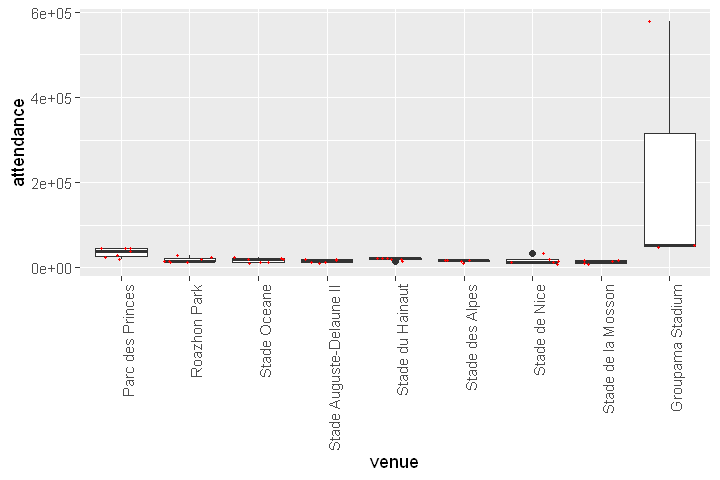

In [6]:
# Housekeeping for plot size
options(repr.plot.width=6, repr.plot.height=4)

# Load the package
library(ggplot2)
ggplot(wwc_3, aes(venue, attendance)) +
   geom_boxplot() +
   geom_jitter(color="red", size=0.5) +
   theme(axis.text.x=element_text(angle=90, hjust=1))

# Make a boxplot of attendance by venue and add the point data

7. What to do with the outlier?

Looking detail into the box plot, it is obvious that one data point at Groupama Stadium lies at 600,000 while all the other datas are less than 100,000. That does not seem right. Considering this, a data entry error could be the source of the problem by mistakenly adding an extra 0.   

After fixing the outlier, we create a new summary table with the updated data.

In [7]:
# Print the number of games played at each venue, and the min and max attendance at each venue
wwc_3  %>% 
  group_by(venue)  %>% 
  summarize(nb_of_games = n(), 
           min_attendance = min(attendance), 
           max_attendance = max(attendance))

# Correct the outlier
wwc_4  <- wwc_3  %>% 
  mutate(attendance = replace(attendance, which(attendance == 579000), 57900))

# Print the updated summary table
wwc_venue_summary  <- wwc_4 %>% 
  group_by(venue)  %>% 
  summarize(nb_of_games = n(), 
           min_attendance = min(attendance), 
           max_attendance = max(attendance))

# Print an updated summary table 
wwc_venue_summary

`summarise()` ungrouping output (override with `.groups` argument)


venue,nb_of_games,min_attendance,max_attendance
Parc des Princes,7,20011,45595
Roazhon Park,7,13201,28267
Stade Oceane,7,10654,23965
Stade Auguste-Delaune II,6,11058,19633
Stade du Hainaut,6,15380,22600
Stade des Alpes,5,11252,17988
Stade de Nice,6,9354,34872
Stade de la Mosson,5,8009,17492
Groupama Stadium,3,48452,579000


`summarise()` ungrouping output (override with `.groups` argument)


venue,nb_of_games,min_attendance,max_attendance
Parc des Princes,7,20011,45595
Roazhon Park,7,13201,28267
Stade Oceane,7,10654,23965
Stade Auguste-Delaune II,6,11058,19633
Stade du Hainaut,6,15380,22600
Stade des Alpes,5,11252,17988
Stade de Nice,6,9354,34872
Stade de la Mosson,5,8009,17492
Groupama Stadium,3,48452,57900


8. Data Visualisation with Boxplot
At this part,the bocplot at the previous session will be redo-ed as the present of the identified outlier might mask other infromation within the dataset. 

This time we will clean up the plot by setting the theme, adding a title, a subtitle, x and y labels, and we will flip the axes to make it easier to read the venue names. We are also going to angle the x-axis text so the numbers will fit within the plot space. And to be fancy, we are going to reorder venue by the attendance within the plot aesthetics so the venues display in descending order of mean attendance.

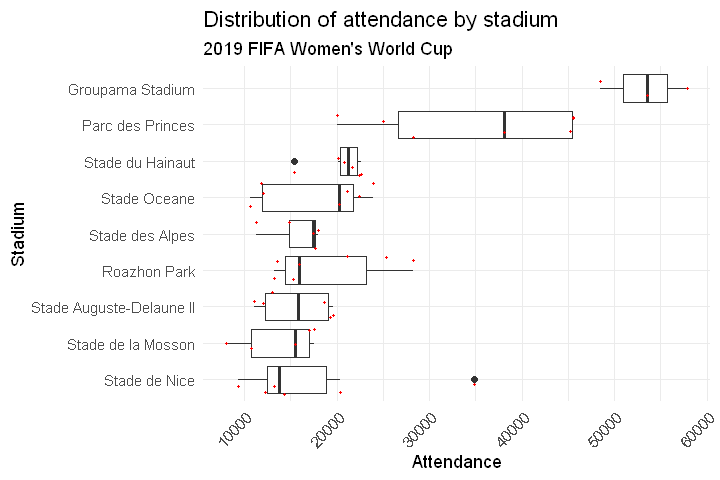

In [8]:
# Housekeeping for plot size
options(repr.plot.width=6, repr.plot.height=4)

# Prettier boxplot of attendance data by venue
wwc_4  %>% 
  ggplot(aes(x= forcats::fct_reorder(venue, attendance), y = attendance)) +
  geom_boxplot() +
  geom_jitter(color = "red", size = 0.5) +
  coord_flip() +  
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, , hjust = 1)) +
  labs(title = "Distribution of attendance by stadium",
       subtitle = "2019 FIFA Women's World Cup", x = "Stadium", y = "Attendance")

9. Data Visualisation with Line plot


That outlier for Stade de Nice looks a little suspect, however that seems fine as it only 100,00 more that the second highest number.Now that the data are clean, let's plot the attendance at each stadium over time so we can tell the boss which stadium had the highest attendance during the tournament.

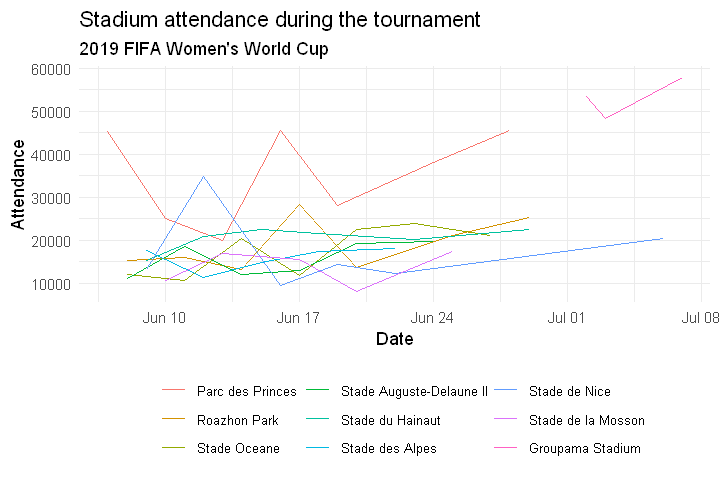

In [9]:
# Housekeeping for plot size
options(repr.plot.width=6, repr.plot.height=4)

# Line plot of attendance over time
wwc_4  %>% 
  ggplot(aes(date, attendance, color = venue)) +
  geom_line() +
  theme_minimal() +
  theme(legend.position = "bottom",
       legend.text = element_text(size = 8)) +
  guides(col = guide_legend(nrow = 3)) +
  labs(title = "Stadium attendance during the tournament",
       subtitle = "2019 FIFA Women's World Cup",
       x = "Date", 
       y = "Attendance",
      color = "") 

10. Wrap up
From the line plot given above, the highes attendance was occured during at the Parc des Prnces stadium while the lowest attendance was at Sate de la Mosson. To answer 
What match had the highest attendance?
In what stadium was the match with the highest attendance played?
we could do some coding as the following

In [10]:
wwc_4 %>% arrange(desc(attendance))

# What game had the higest attendance?
ans_1  <- "B"

# Which stadium was the game with highest attendance play in?
ans_2  <- "A"

round,wk,day,date,time,home,home_score,away_score,home_pks,away_pks,away,attendance,venue,referee,notes
Final,FIN,Sun,2019-07-07,17:00:00,USA,2,0,0,0,Netherlands,57900,Groupama Stadium,Stephanie Frappart,NA
Semifinals,SMIF,Tue,2019-07-02,21:00:00,England,1,2,0,0,USA,53512,Groupama Stadium,Edina Alves Batista,NA
Semifinals,SMIF,Wed,2019-07-03,21:00:00,Netherlands,1,0,0,0,Sweden,48452,Groupama Stadium,Marie-Soleil Beaudoin,Required Extra Time
Quarterfinals,QRTF,Fri,2019-06-28,21:00:00,France,1,2,0,0,USA,45595,Parc des Princes,Kateryna Monzul,NA
Group stage,2,Sun,2019-06-16,18:00:00,USA,3,0,0,0,Chile,45594,Parc des Princes,Riem Hussein,NA
Group stage,1,Fri,2019-06-07,21:00:00,France,4,0,0,0,Korea Rep,45261,Parc des Princes,Claudia Umpierrez,NA
Round of 16,R16,Mon,2019-06-24,21:00:00,Sweden,1,0,0,0,Canada,38078,Parc des Princes,Kate Jacewicz,NA
Group stage,2,Wed,2019-06-12,21:00:00,France,2,1,0,0,Norway,34872,Stade de Nice,Bibiana Steinhaus,NA
Group stage,3,Mon,2019-06-17,21:00:00,Nigeria,0,1,0,0,France,28267,Roazhon Park,Melissa Borjas,NA
Group stage,3,Wed,2019-06-19,21:00:00,Scotland,3,3,0,0,Argentina,28205,Parc des Princes,Ri Hyang Ok,NA
